## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import cv2
from tensorflow.keras import layers, initializers, applications
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate, Input
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [4]:
model=tf.keras.models.load_model('sementation_aerial.h5')

In [5]:
def read_data(main_path, image_path, mask_path, n_tails=8, size=(544, 480)):
    
    features = []
    target = []
    main_image_path = os.path.join(main_path, 'Tile 4', image_path)
    main_mask_path = os.path.join(main_path, 'Tile 4', mask_path)

    X, y = read_tile(main_image_path, main_mask_path)
    features.append(X)
    target.append(y)
        
    features = np.array(features)
    features = features.reshape((features.shape[0]*features.shape[1], features.shape[2], features.shape[3], features.shape[4]))
    target = np.array(target)
    target = target.reshape((target.shape[0]*target.shape[1], target.shape[2], target.shape[3]))
    
    return features, target

def show_images(images, masks, nx=2, ny=4, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.axis("off")

    for i in range(0, nx*ny):
        if i < nx*ny // 2:
            ax = plt.subplot(nx, ny, i+1)
            plt.imshow(images[i])
        else:
            ax = plt.subplot(nx, ny, i+1)
            plt.imshow(masks[i-nx*ny//2])

In [14]:
main_path = 'dataset1'
imagesr_path = 'images_sr'
image_path = 'images'
mask_path = 'masks'
X, y = read_data(main_path, image_path, mask_path)
X=X/255
Xsr, y = read_data(main_path, imagesr_path, mask_path)
Xsr=Xsr/255

In [15]:
y_pred = model.predict(X)
y_pred_sr = model.predict(Xsr)

1/1 [==============================] - 0s 21ms/step


In [16]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    return pred_mask
y_mask = create_mask(y_pred)
y_mask_sr = create_mask(y_pred_sr)

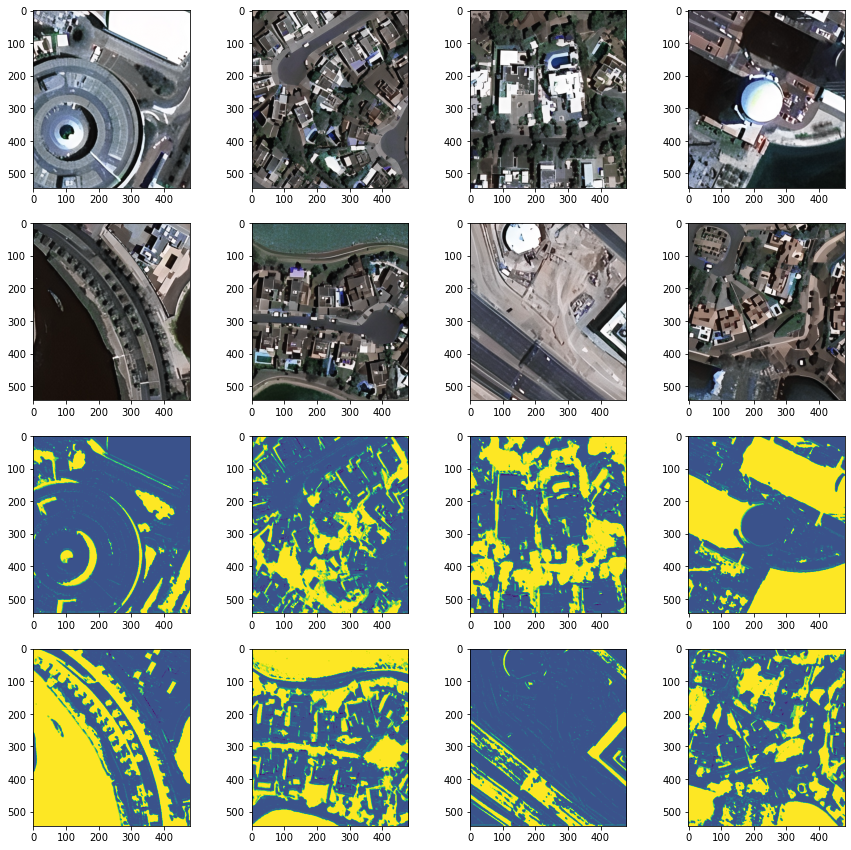

In [24]:
show_images(Xsr, y_mask_sr, nx=4, ny=4, figsize=(15, 15))

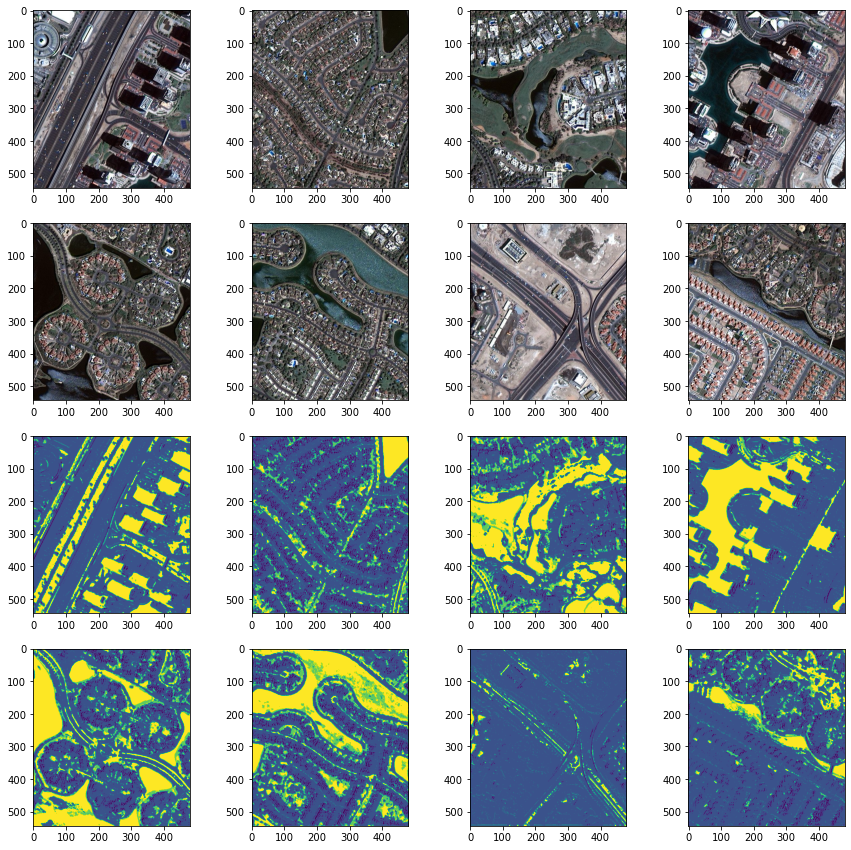

In [25]:
show_images(X, y_mask, nx=4, ny=4, figsize=(15, 15))